In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import itertools
%matplotlib inline

mpl.rc('font', family='AppleGothic')  # macOS 기본 한글 지원 폰트
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('nightlife_crime.csv')

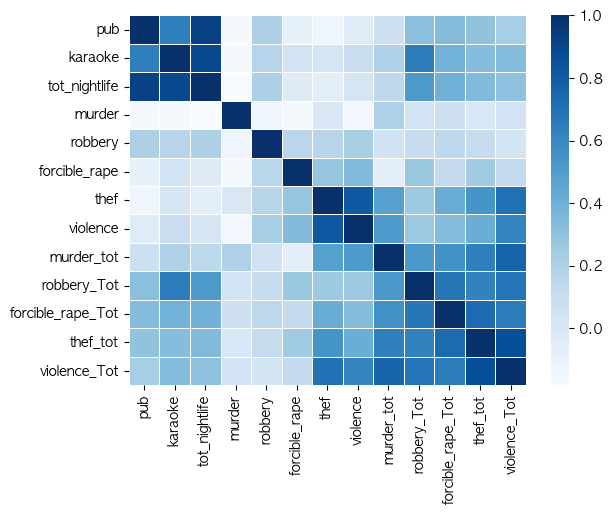

In [24]:
# 문자열 컬럼 제외하고 숫자형만 선택해서 상관행렬 계산
numeric_data = data.select_dtypes(include=['number'])  # 숫자형 컬럼만 추출
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix

#heatmap
plt.figure()
sns.heatmap(data = numeric_data.corr(), annot=False,
            fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [20]:
# 파생변수 계산

data['crime_tot'] = data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot']
data['murder_ratio'] = data['murder'] / data['murder_tot']
data['robbery_ratio'] = data['robbery'] / data['robbery_Tot']
data['rape_ratio'] = data['forcible_rape'] / data['forcible_rape_Tot']
data['thef_ratio'] = data['thef'] / data['thef_tot']
data['violence_ratio'] = data['violence'] / data['violence_Tot']
data['total_youth_ratio'] = (data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']) / \
                          (data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot'])
data['total_youth'] = data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']

data

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,thef_tot,violence_Tot,crime_tot,murder_ratio,robbery_ratio,rape_ratio,thef_ratio,violence_ratio,total_youth_ratio,total_youth
0,강남,283,354,637,0,6,19,140,176,3,...,2484,2604,5422,0.000000,0.285714,0.061290,0.056361,0.067588,0.062892,341
1,강동,146,106,252,0,3,6,193,158,4,...,2366,2712,5244,0.000000,0.500000,0.038462,0.081572,0.058260,0.068650,360
2,강북,79,128,207,0,0,9,166,210,7,...,1434,2649,4257,0.000000,0.000000,0.058824,0.115760,0.079275,0.090439,385
3,강서,113,167,280,0,3,9,273,240,7,...,2096,3207,5585,0.000000,0.230769,0.034351,0.130248,0.074836,0.094002,525
4,관악,223,99,322,0,2,14,170,209,9,...,2706,3298,6345,0.000000,0.166667,0.043750,0.062823,0.063372,0.062254,395
5,광진,19,91,110,0,0,29,155,153,4,...,3026,2625,5909,0.000000,0.000000,0.120833,0.051223,0.058286,0.057032,337
6,구로,38,110,148,0,1,3,157,194,8,...,2335,3007,5646,0.000000,0.066667,0.010676,0.067238,0.064516,0.062876,355
7,금천,60,82,142,0,0,7,146,66,3,...,1567,2054,3781,0.000000,0.000000,0.046358,0.093172,0.032132,0.057921,219
8,노원,30,57,87,0,6,14,227,337,10,...,2193,2723,5130,0.000000,0.857143,0.071066,0.103511,0.123761,0.113840,584
9,도봉,21,55,76,0,6,21,126,107,3,...,1063,1487,2664,0.000000,0.666667,0.205882,0.118532,0.071957,0.097598,260


## 산점도

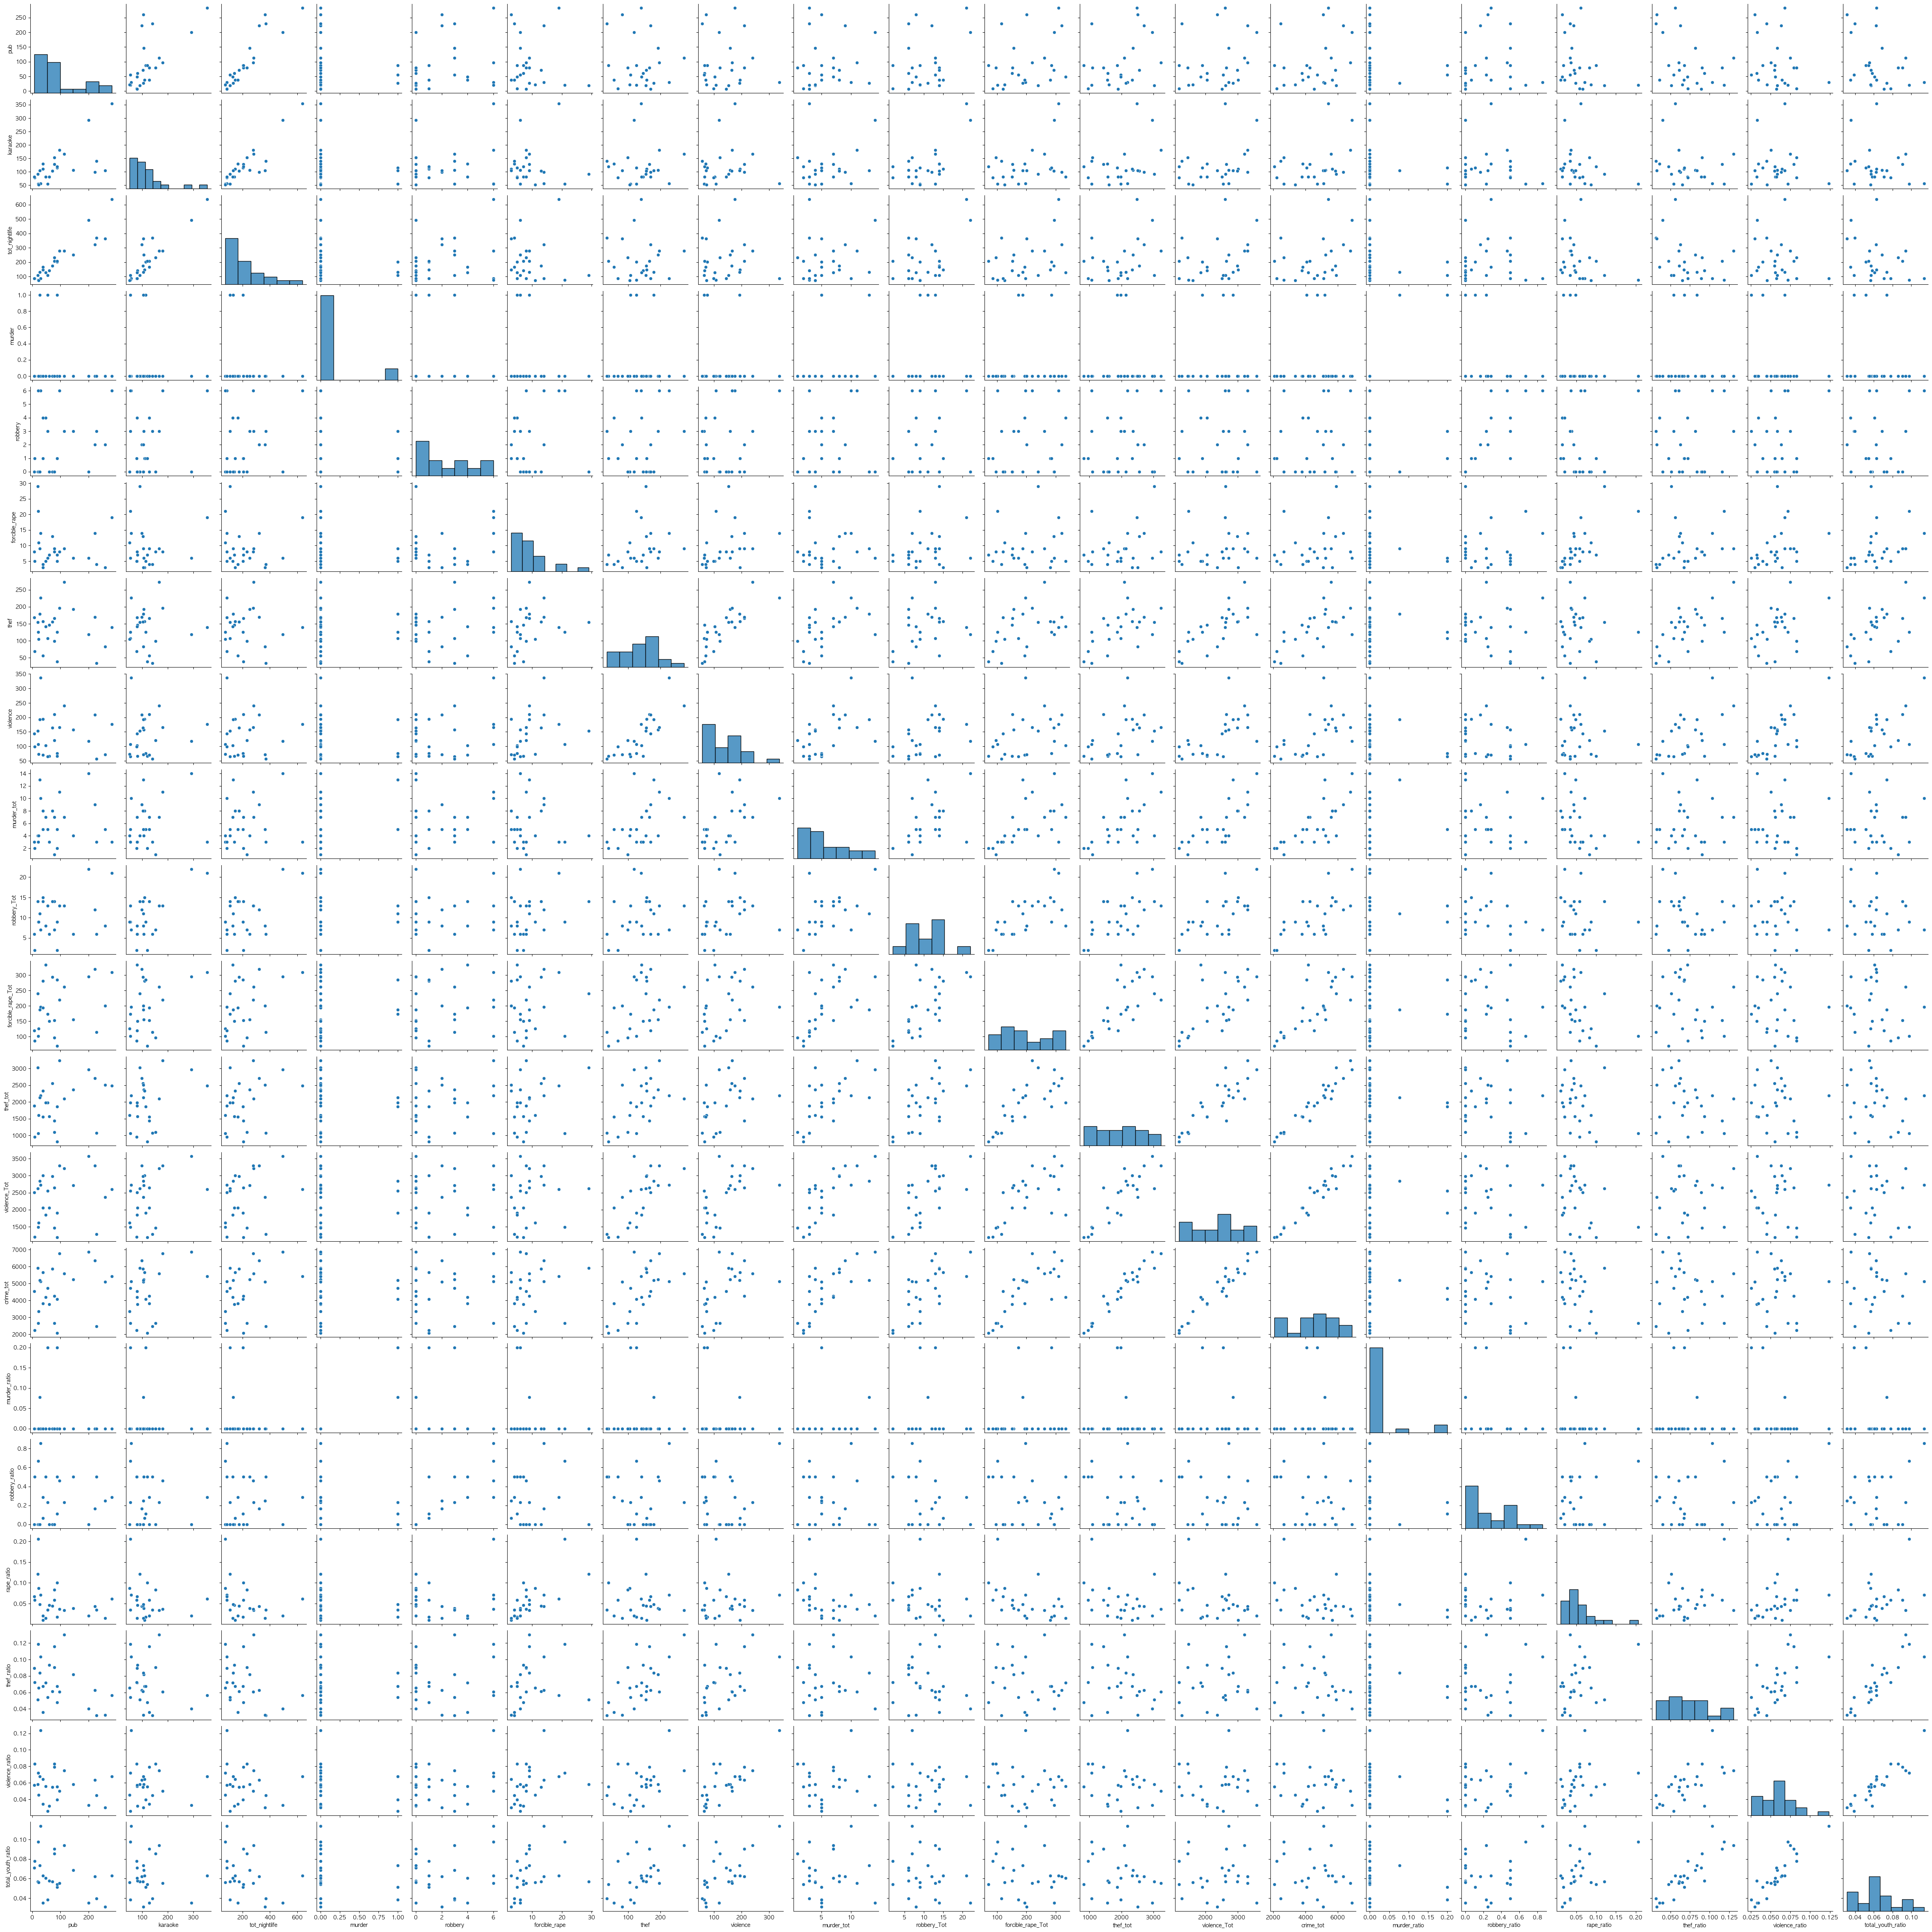

In [10]:
sns.pairplot(data)
plt.savefig('image/figure05.png')
plt.show()

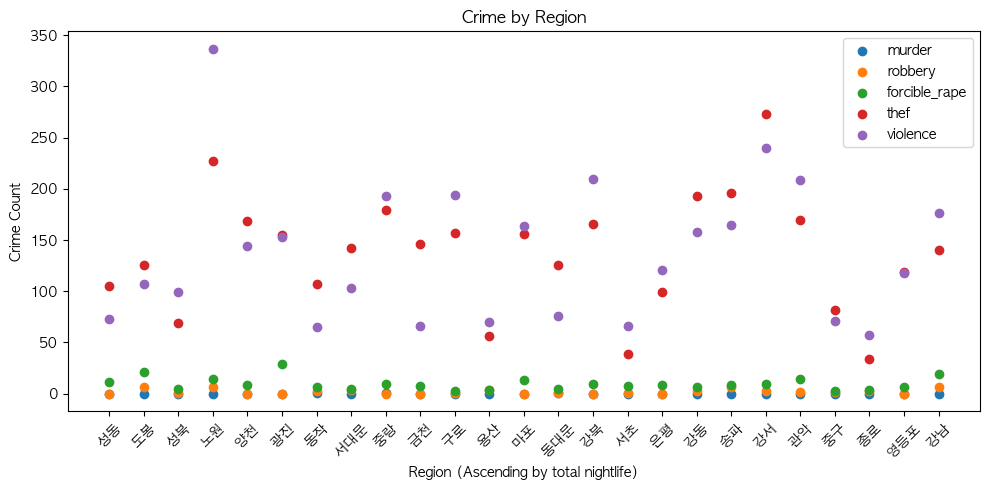

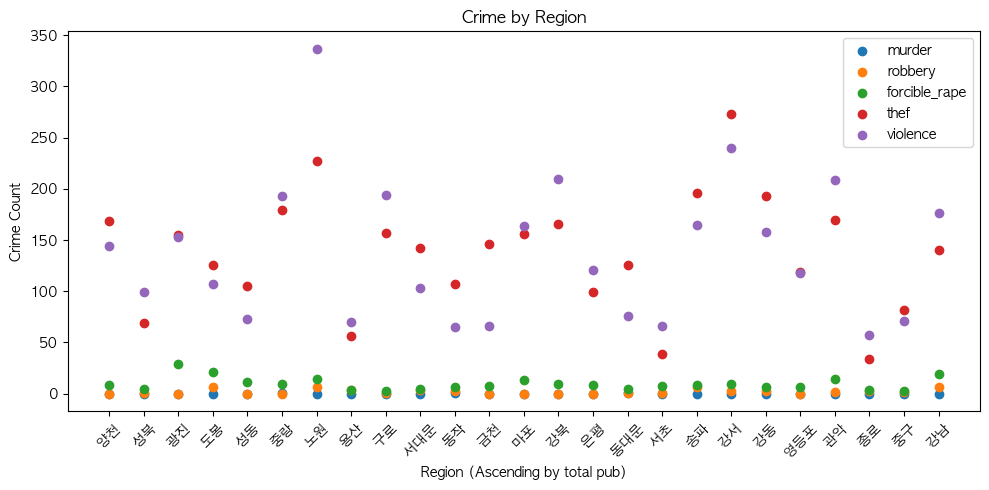

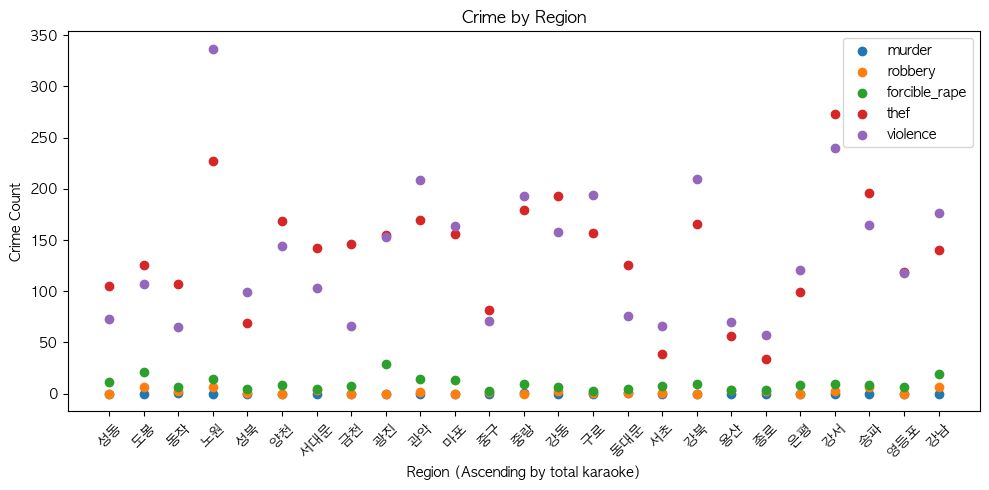

In [58]:
# 산점도

# 유흥업소 점포수 오름차순으로 지역 정렬, 산점도
sort = data.sort_values(by='tot_nightlife',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total nightlife)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure01.png')
plt.show()

# pub 점포수 오름차순으로 지역 정렬, 산점도
sort = data.sort_values(by='pub',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total pub)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure02.png')
plt.show()

# karaoke 점포수 오름차순으로 지역 정렬, 산점도

sort = data.sort_values(by='karaoke',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total karaoke)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure03.png')
plt.show()


> 점포수 별로 범죄율 증가 안하는 것 같은데...?

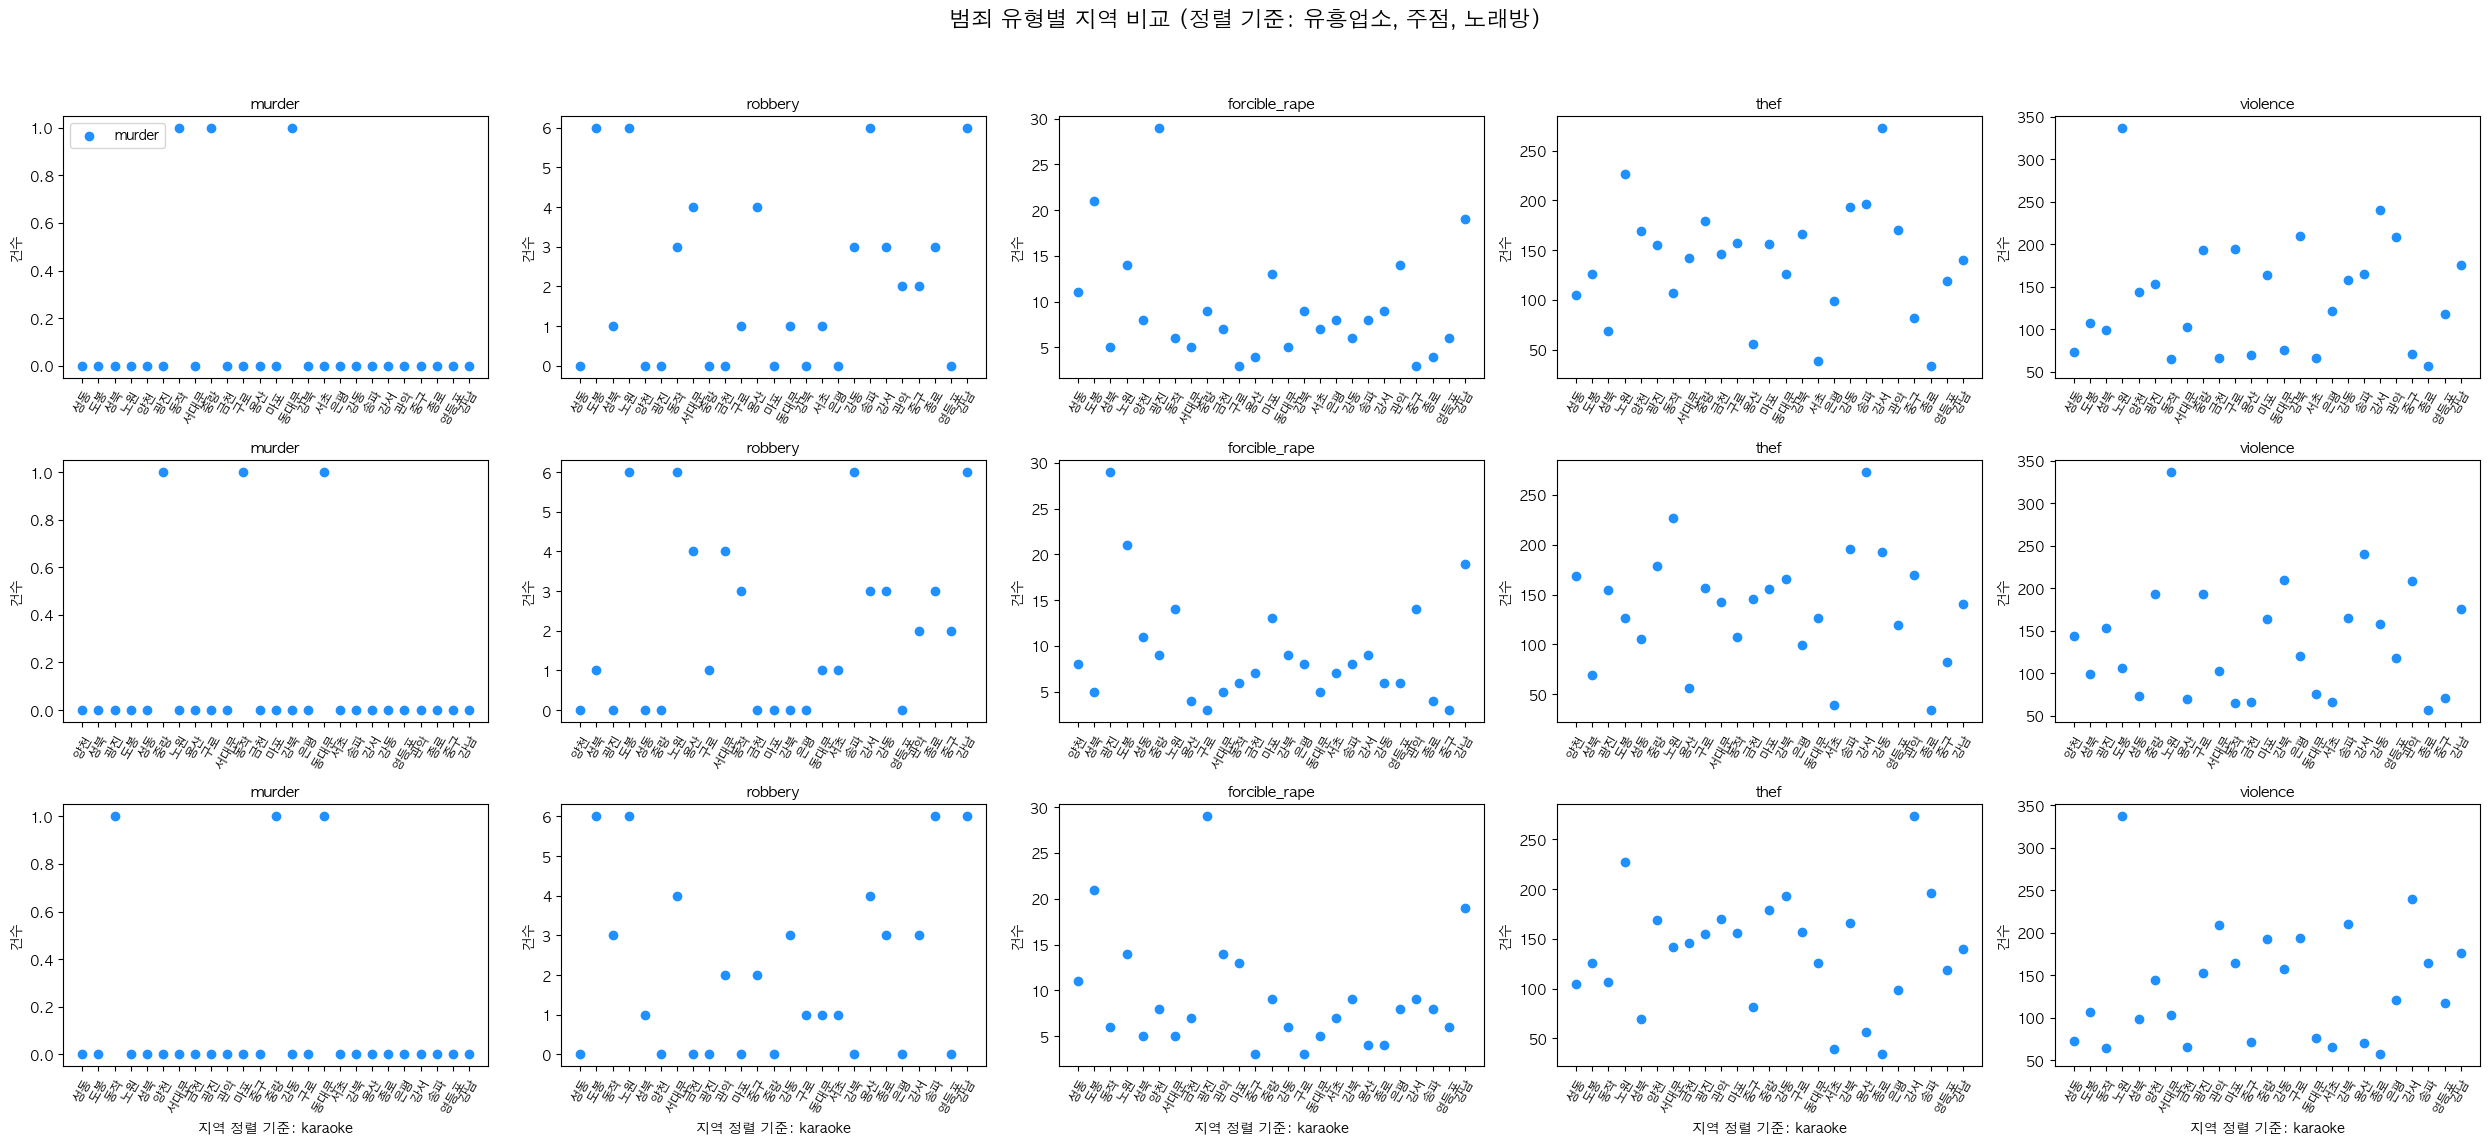

In [18]:
# 정렬 기준과 컬럼 이름
sort_keys = ['tot_nightlife', 'pub', 'karaoke']
crime_cols = ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 서브플롯 생성 (3행 x 5열)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 12))
fig.suptitle('범죄 유형별 지역 비교 (정렬 기준: 유흥업소, 주점, 노래방)', fontsize=16)
plt.subplots_adjust(hspace=0.4)

# 반복해서 각 그래프 그리기
for i, sort_key in enumerate(sort_keys):
    sorted_data = data.sort_values(by=sort_key, ascending=True)
    for j, crime in enumerate(crime_cols):
        ax = axes[i, j]
        ax.scatter(sorted_data['region'], sorted_data[crime], color='dodgerblue', label=crime)
        ax.set_title(f"{crime}", fontsize=11)
        ax.set_xticks(range(len(sorted_data['region'])))
        ax.set_xticklabels(sorted_data['region'], rotation=60, fontsize=9)
        ax.set_ylabel('건수')
        if i == 2:  # 마지막 행만 x축 라벨
            ax.set_xlabel(f"지역 정렬 기준: {sort_key}")

# 범례는 하나만 따로
axes[0, 0].legend(loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 영역 확보
plt.savefig('image/figure04.png')
plt.show()


# 피어슨 상관계수

분석 기준
- 0.7 이상: 강한 양의 상관
- 0.3 ~ 0.7: 중간 정도의 상관
- 0 ~ 0.3: 약한 상관
- 음수: 반비례 관계


In [15]:
# 문자열 컬럼 제외하고 숫자형만 선택해서 상관행렬 계산
numeric_data = data.select_dtypes(include=['number'])  # 숫자형 컬럼만 추출
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,crime_tot,murder_ratio,robbery_ratio,rape_ratio,thef_ratio,violence_ratio,total_youth_ratio
pub,1.000000,0.645022,0.922502,-0.166262,0.206950,-0.087177,-0.122257,-0.040994,0.072228,0.318181,0.334303,0.300736,0.233037,0.283625,-0.122442,0.038932,-0.331106,-0.410418,-0.247990,-0.380246
karaoke,0.645022,1.000000,0.889996,-0.161529,0.170792,0.041389,0.017581,0.095926,0.205042,0.652071,0.387320,0.327938,0.337151,0.354027,-0.167796,-0.140817,-0.235801,-0.240293,-0.083646,-0.199648
tot_nightlife,0.922502,0.889996,1.000000,-0.180798,0.209755,-0.031111,-0.064069,0.023993,0.146668,0.519228,0.395118,0.345094,0.309352,0.348061,-0.157817,-0.047899,-0.316674,-0.366268,-0.190224,-0.327734
murder,-0.166262,-0.161529,-0.180798,1.000000,-0.128090,-0.161566,0.000619,-0.142715,0.197589,0.042136,0.075428,0.007788,0.038845,0.028417,0.931955,-0.195233,-0.192183,-0.041048,-0.240056,-0.163895
robbery,0.206950,0.170792,0.209755,-0.128090,1.000000,0.160439,0.168731,0.223769,0.045288,0.102684,0.147945,0.112583,0.035530,0.081306,-0.064363,0.786430,0.118641,0.063735,0.224117,0.189447
forcible_rape,-0.087177,0.041389,-0.031111,-0.161566,0.160439,1.000000,0.285533,0.340591,-0.065149,0.274810,0.127463,0.256641,0.130125,0.197819,-0.184743,0.002491,0.708211,0.203778,0.341547,0.350607
thef,-0.122257,0.017581,-0.064069,0.000619,0.168731,0.285533,1.000000,0.811187,0.486157,0.264591,0.417398,0.538971,0.707235,0.644191,-0.065892,-0.041870,-0.059256,0.652045,0.446321,0.575112
violence,-0.040994,0.095926,0.023993,-0.142715,0.223769,0.340591,0.811187,1.000000,0.512233,0.268458,0.337486,0.411275,0.620140,0.533981,-0.240540,0.126289,0.006467,0.526944,0.767925,0.691487
murder_tot,0.072228,0.205042,0.146668,0.197589,0.045288,-0.065149,0.486157,0.512233,1.000000,0.524660,0.560966,0.638719,0.763267,0.731152,0.045397,-0.102319,-0.380394,-0.005993,0.063223,-0.004214
robbery_Tot,0.318181,0.652071,0.519228,0.042136,0.102684,0.274810,0.264591,0.268458,0.524660,1.000000,0.675633,0.630395,0.689725,0.697052,0.039269,-0.390045,-0.206632,-0.165370,-0.172480,-0.214502


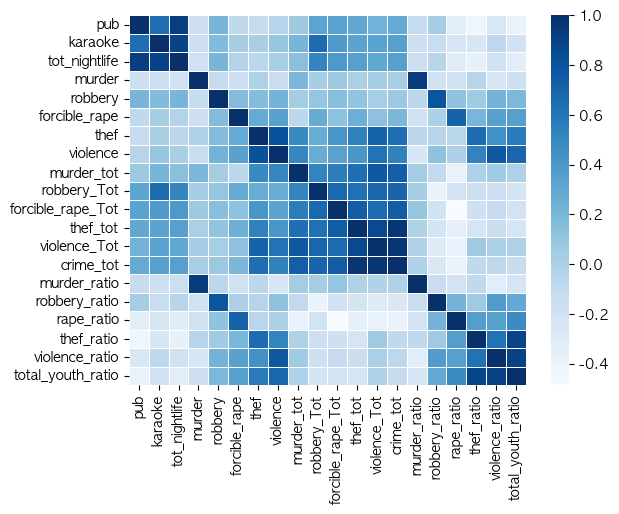

In [18]:
plt.figure()
sns.heatmap(data = numeric_data.corr(), annot=False,
            fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

## 비교시각화 1

유흥업소 수 vs 청소년 범죄율 비교로 지역 간 청소년 범죄 수준의 상대적 차이 파악

**시각화 방식: 산점도(Scatter Plot)**
x축: 'tot_nightlife', 'pub', 'karaoke'
y축: 'total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence'

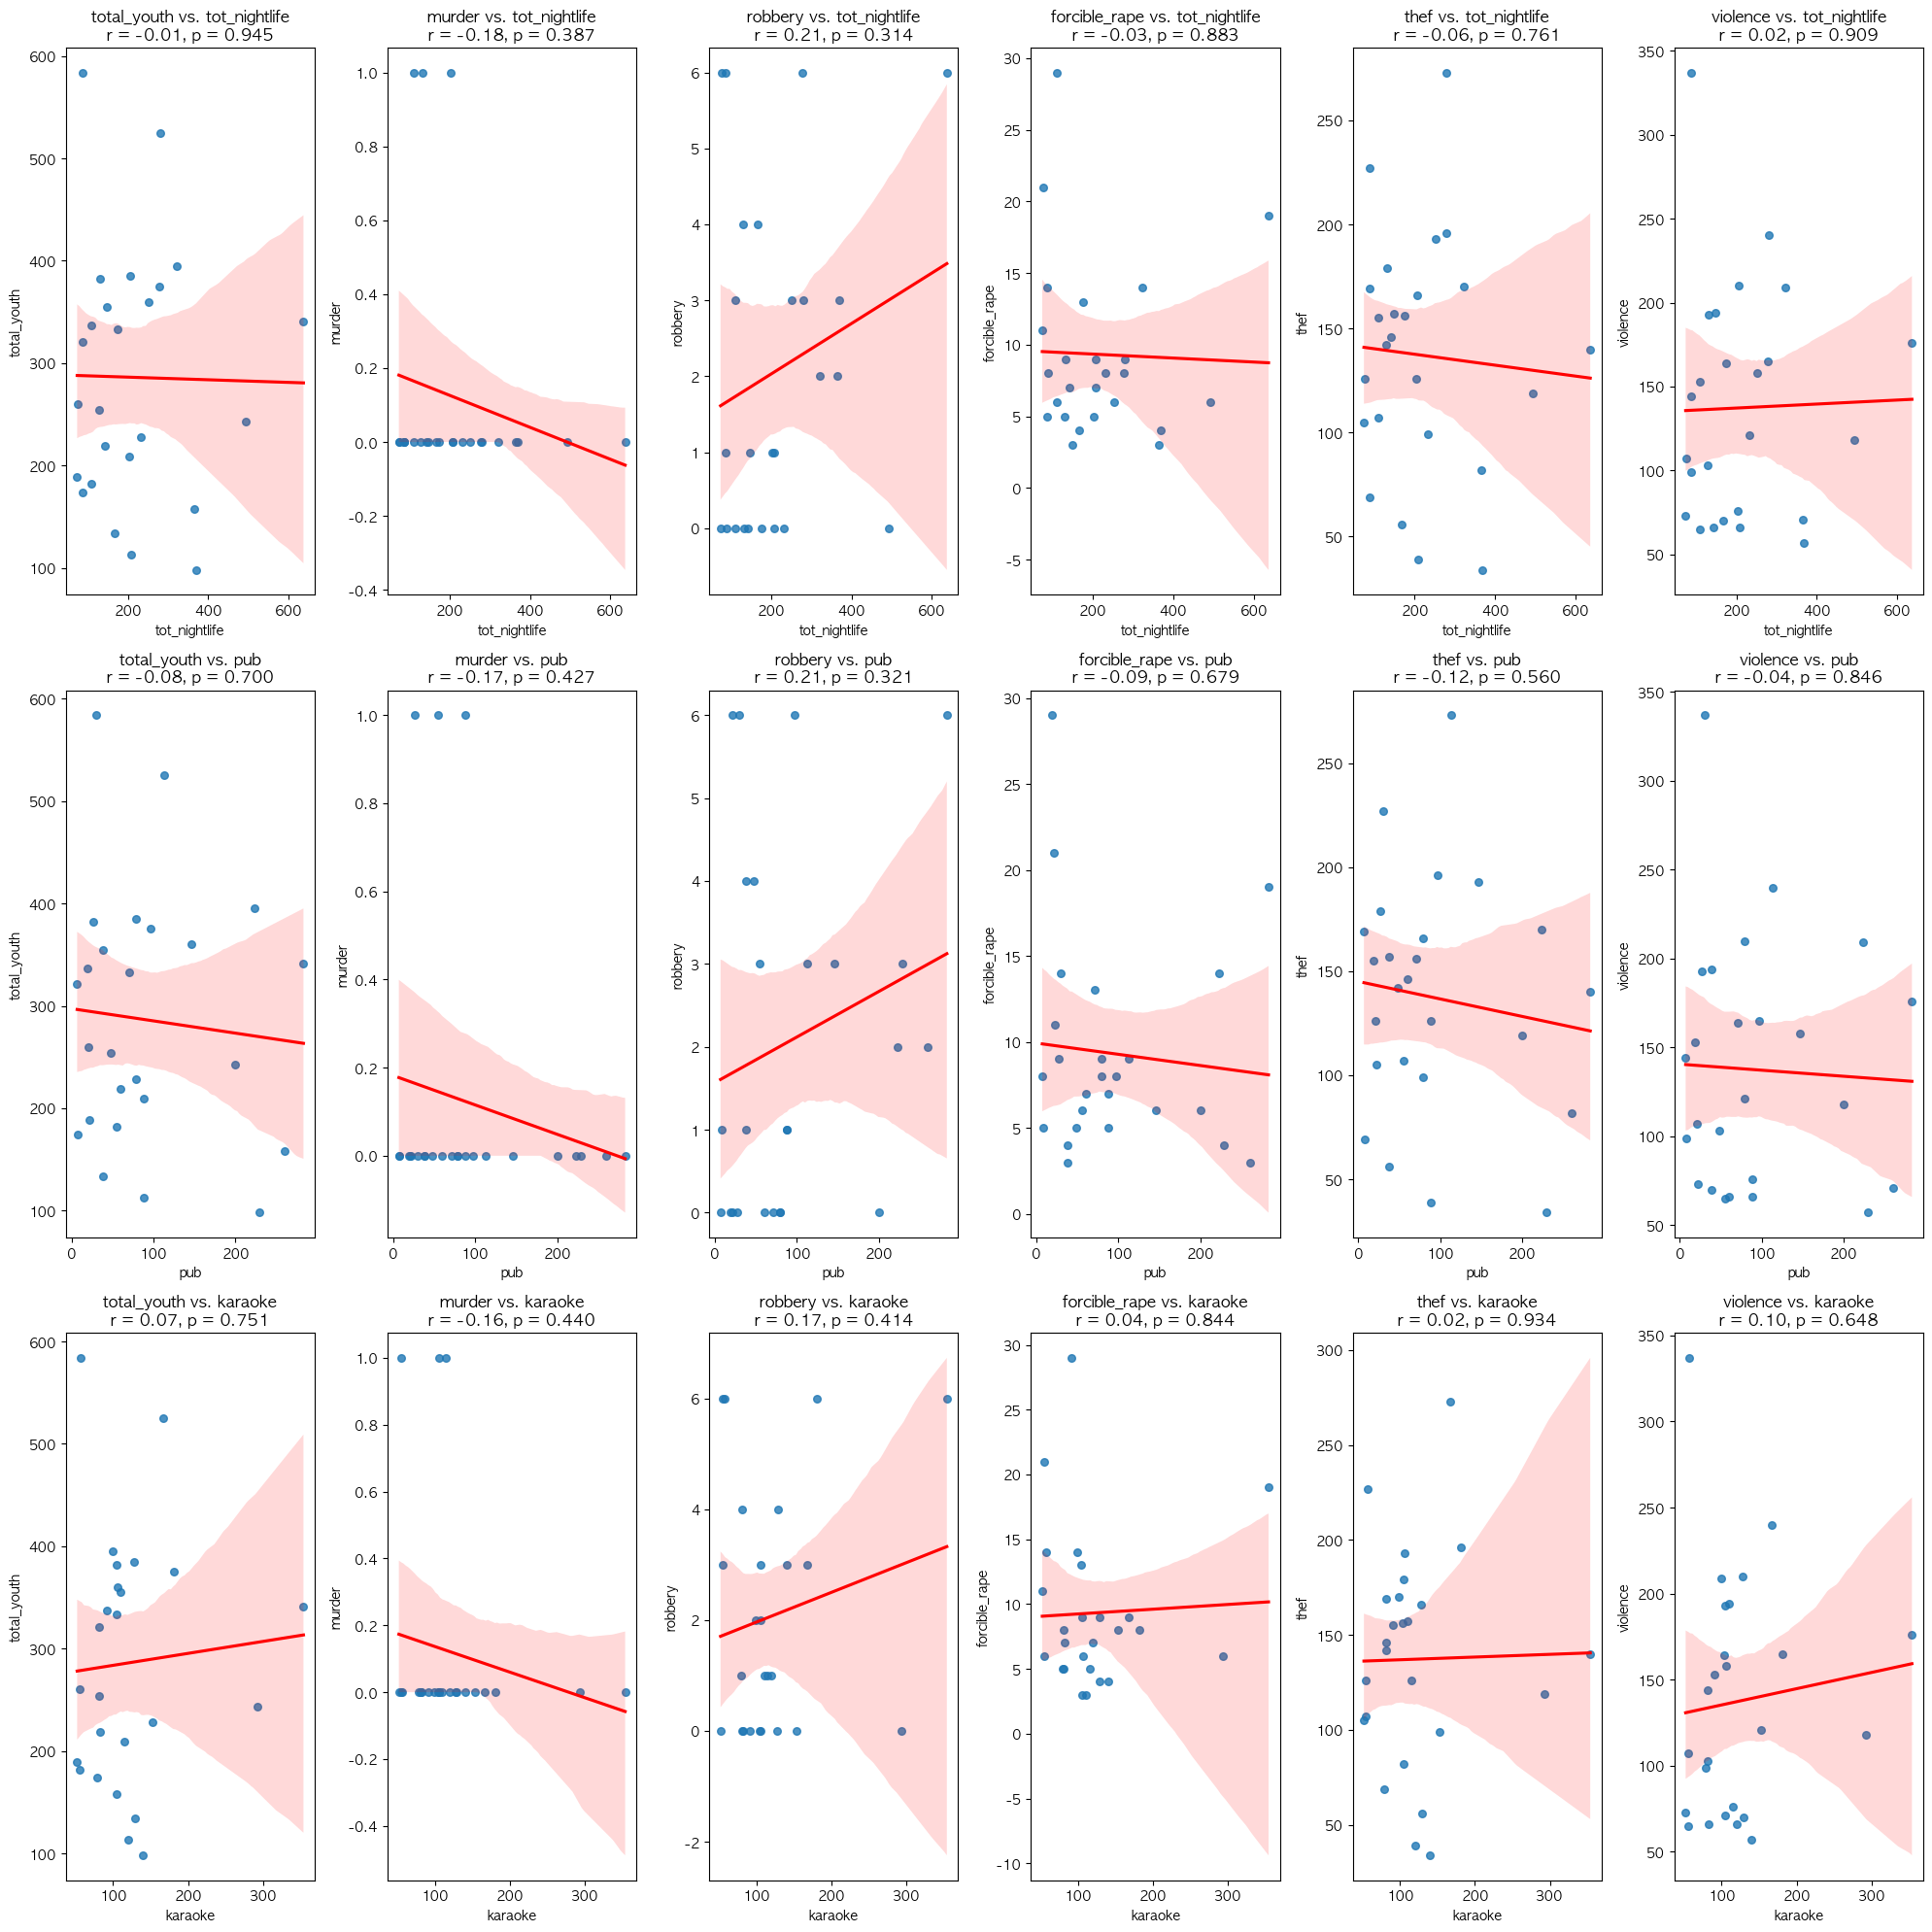


📊 상관분석 결과:

       X Variable     Y Variable  Pearson r  p-value
0   tot_nightlife    total_youth     -0.015   0.9449
1   tot_nightlife         murder     -0.181   0.3871
2   tot_nightlife        robbery      0.210   0.3143
3   tot_nightlife  forcible_rape     -0.031   0.8826
4   tot_nightlife           thef     -0.064   0.7609
5   tot_nightlife       violence      0.024   0.9094
6             pub    total_youth     -0.081   0.7002
7             pub         murder     -0.166   0.4270
8             pub        robbery      0.207   0.3209
9             pub  forcible_rape     -0.087   0.6786
10            pub           thef     -0.122   0.5604
11            pub       violence     -0.041   0.8457
12        karaoke    total_youth      0.067   0.7507
13        karaoke         murder     -0.162   0.4405
14        karaoke        robbery      0.171   0.4143
15        karaoke  forcible_rape      0.041   0.8443
16        karaoke           thef      0.018   0.9335
17        karaoke       violence 

<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
from scipy.stats import pearsonr
import itertools

# 3. 분석할 변수 목록 정의
x_vars = ['tot_nightlife', 'pub', 'karaoke']
y_vars = ['total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 4. 상관계수 계산 결과 저장
correlation_results = []

# 5. 시각화
plt.figure(figsize=(20, 20))
plot_idx = 1

for x, y in itertools.product(x_vars, y_vars):
    r, p = pearsonr(data[x], data[y])
    correlation_results.append({
        'X Variable': x,
        'Y Variable': y,
        'Pearson r': round(r, 3),
        'p-value': round(p, 4)
    })

    # 회귀선 그래프 그리기
    plt.subplot(len(x_vars), len(y_vars), plot_idx)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f'{y} vs. {x}\nr = {r:.2f}, p = {p:.3f}')
    plt.xlabel(x)
    plt.ylabel(y)
    plot_idx += 1

plt.tight_layout()
plt.savefig('image/figure07.png')
plt.show()


# 6. 상관계수 결과 출력
correlation_df = pd.DataFrame(correlation_results)
print("\n📊 상관분석 결과:\n")
print(correlation_df)


| X Variable     | Y Variable     | Pearson r | p-value | 해석                     |
|----------------|----------------|-----------|---------|--------------------------|
| tot_nightlife  | total_youth    | -0.015    | 0.9449  | 유의미한 상관 없음       |
| tot_nightlife  | murder         | -0.181    | 0.3871  | 유의미한 상관 없음       |
| tot_nightlife  | robbery        | 0.210     | 0.3143  | 유의미한 상관 없음       |
| tot_nightlife  | forcible_rape  | -0.031    | 0.8826  | 유의미한 상관 없음       |
| tot_nightlife  | thef           | -0.064    | 0.7609  | 유의미한 상관 없음       |
| tot_nightlife  | violence       | 0.024     | 0.9094  | 유의미한 상관 없음       |
| pub            | total_youth    | -0.081    | 0.7002  | 유의미한 상관 없음       |
| pub            | murder         | -0.166    | 0.4270  | 유의미한 상관 없음       |
| pub            | robbery        | 0.207     | 0.3209  | 유의미한 상관 없음       |
| pub            | forcible_rape  | -0.087    | 0.6786  | 유의미한 상관 없음       |
| pub            | thef           | -0.122    | 0.5604  | 유의미한 상관 없음       |
| pub            | violence       | -0.041    | 0.8457  | 유의미한 상관 없음       |
| karaoke        | total_youth    | 0.067     | 0.7507  | 유의미한 상관 없음       |
| karaoke        | murder         | -0.162    | 0.4405  | 유의미한 상관 없음       |
| karaoke        | robbery        | 0.171     | 0.4143  | 유의미한 상관 없음       |
| karaoke        | forcible_rape  | 0.041     | 0.8443  | 유의미한 상관 없음       |
| karaoke        | thef           | 0.018     | 0.9335  | 유의미한 상관 없음       |
| karaoke        | violence       | 0.096     | 0.6483  | 유의미한 상관 없음       |



Pearson correlation: r = -0.328, p = 0.110
                            OLS Regression Results                            
Dep. Variable:      total_youth_ratio   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.768
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.110
Time:                        13:47:17   Log-Likelihood:                 63.069
No. Observations:                  25   AIC:                            -122.1
Df Residuals:                      23   BIC:                            -119.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

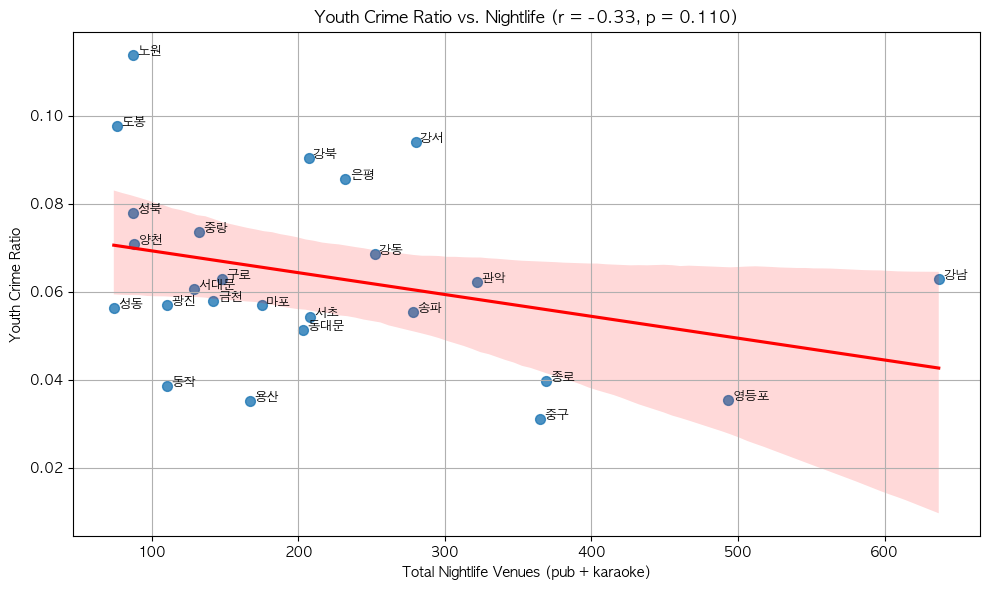

In [27]:
# 상관계수 계산
corr_coef, p_value = pearsonr(data["tot_nightlife"], data["total_youth_ratio"])
print(f"Pearson correlation: r = {corr_coef:.3f}, p = {p_value:.3f}")

# 회귀 분석
X = sm.add_constant(data["tot_nightlife"])  # 상수항 추가
y = data["total_youth_ratio"]
model = sm.OLS(y, X).fit()
print(model.summary())

# 산점도 + 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.regplot(x="tot_nightlife", y="total_youth_ratio", data=data,
            scatter_kws={"s": 50}, line_kws={"color": "red"})

# 도시 이름 라벨 추가
for i in range(len(data)):
    plt.text(data["tot_nightlife"][i] + 3, data["total_youth_ratio"][i], data["region"][i], fontsize=9)

plt.xlabel("Total Nightlife Venues (pub + karaoke)")
plt.ylabel("Youth Crime Ratio")
plt.title(f"Youth Crime Ratio vs. Nightlife (r = {corr_coef:.2f}, p = {p_value:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
## 해석력이 떨어지는 변수 제외
## 표준편차가 매우 낮음 (std < 1, std == 0)
## 0이 전체의 90% 이상
## 

low_variance_cols = []
for col in ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']:
    std = data[col].std()
    uniq = data[col].nunique()
    zero_ratio = (data[col] == 0).mean()
    
    if std < 1 or uniq <= 2 or zero_ratio > 0.9:
        low_variance_cols.append(col)

print("제외 권장 변수:", low_variance_cols)

제외 권장 변수: ['murder']


## 비교시각화 2

범죄수 수 vs 청소년 범죄율 비교로 지역 간 청소년 범죄 수준의 상대적 차이 파악

In [29]:
data.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,thef_tot,violence_Tot,crime_tot,murder_ratio,robbery_ratio,rape_ratio,thef_ratio,violence_ratio,total_youth_ratio,total_youth
0,강남,283,354,637,0,6,19,140,176,3,...,2484,2604,5422,0.0,0.285714,0.061290,0.056361,0.067588,0.062892,341
1,강동,146,106,252,0,3,6,193,158,4,...,2366,2712,5244,0.0,0.500000,0.038462,0.081572,0.058260,0.068650,360
2,강북,79,128,207,0,0,9,166,210,7,...,1434,2649,4257,0.0,0.000000,0.058824,0.115760,0.079275,0.090439,385
3,강서,113,167,280,0,3,9,273,240,7,...,2096,3207,5585,0.0,0.230769,0.034351,0.130248,0.074836,0.094002,525
4,관악,223,99,322,0,2,14,170,209,9,...,2706,3298,6345,0.0,0.166667,0.043750,0.062823,0.063372,0.062254,395


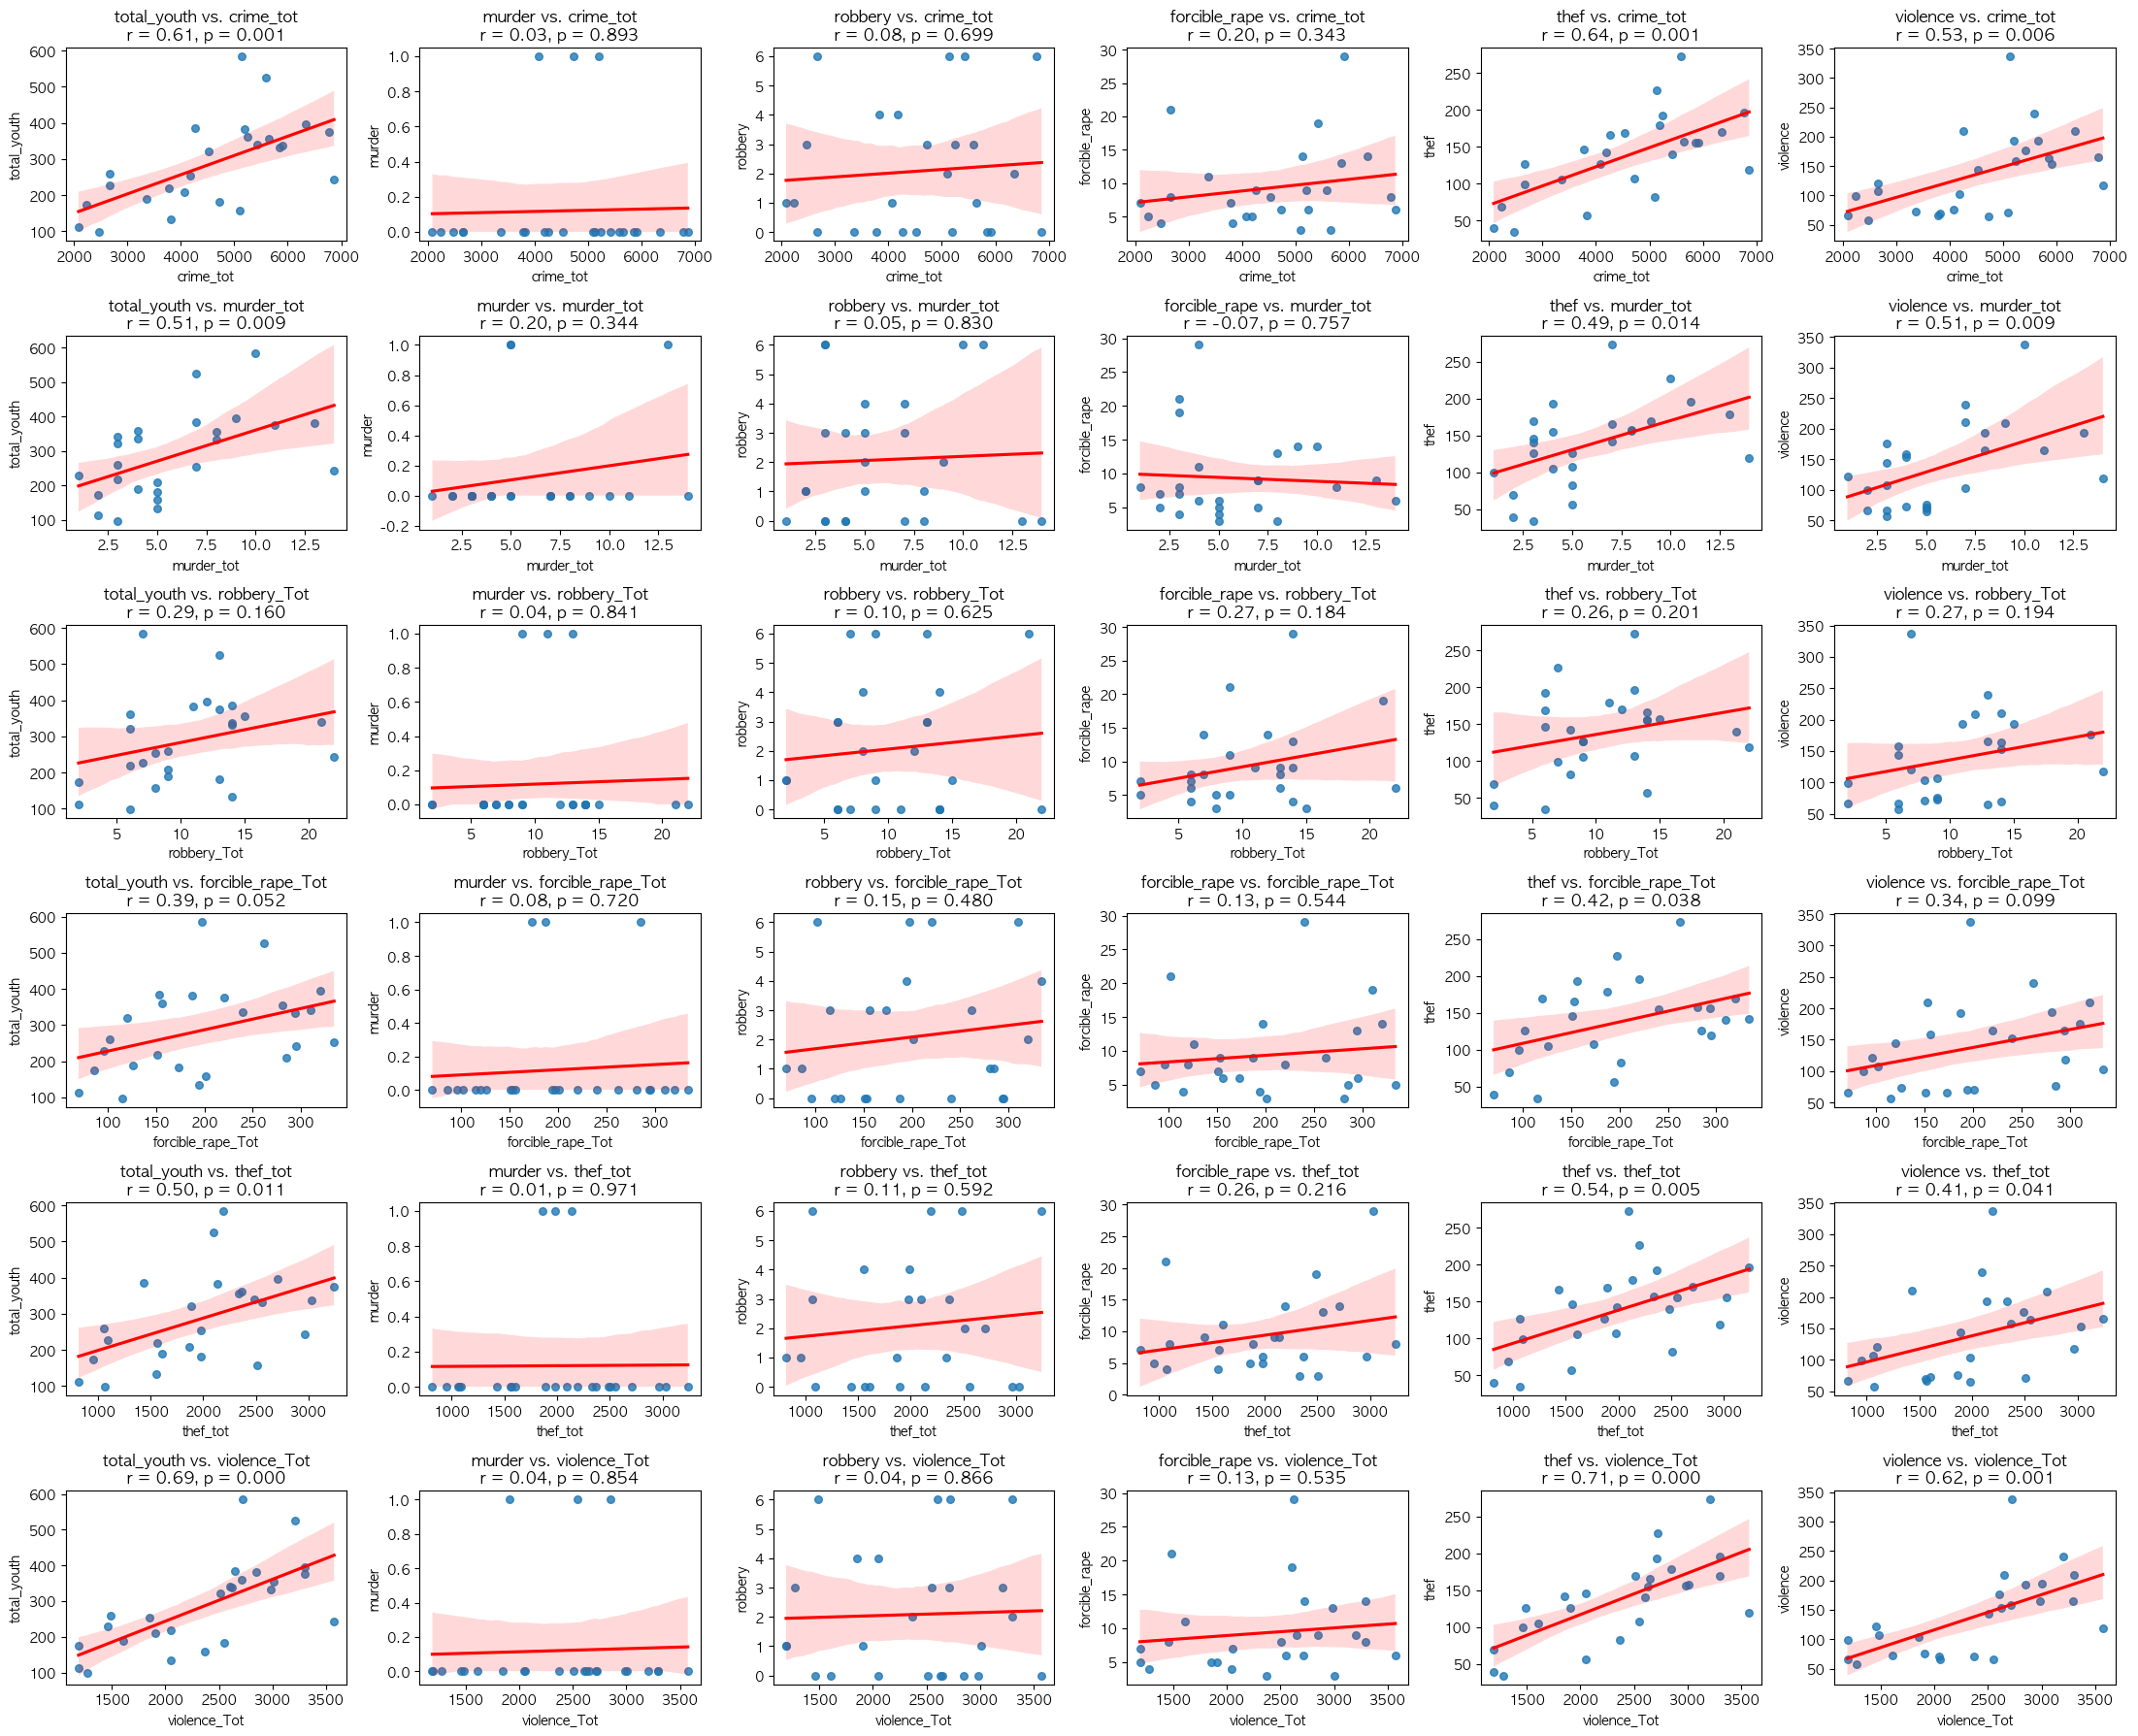


📊 상관분석 결과:

           X Variable     Y Variable  Pearson r  p-value
0           crime_tot    total_youth      0.611   0.0012
1           crime_tot         murder      0.028   0.8927
2           crime_tot        robbery      0.081   0.6992
3           crime_tot  forcible_rape      0.198   0.3432
4           crime_tot           thef      0.644   0.0005
5           crime_tot       violence      0.534   0.0060
6          murder_tot    total_youth      0.512   0.0088
7          murder_tot         murder      0.198   0.3438
8          murder_tot        robbery      0.045   0.8298
9          murder_tot  forcible_rape     -0.065   0.7570
10         murder_tot           thef      0.486   0.0137
11         murder_tot       violence      0.512   0.0088
12        robbery_Tot    total_youth      0.290   0.1598
13        robbery_Tot         murder      0.042   0.8415
14        robbery_Tot        robbery      0.103   0.6252
15        robbery_Tot  forcible_rape      0.275   0.1837
16        robbery_

In [35]:
# 3. 분석할 변수 목록 정의
x_vars = ['crime_tot', 'murder_tot', 'robbery_Tot', 'forcible_rape_Tot', 'thef_tot', 'violence_Tot']
y_vars = ['total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 4. 상관계수 계산 결과 저장
correlation_results = []

# 5. 시각화
plt.figure(figsize=(22, 18))
plot_idx = 1

for x, y in itertools.product(x_vars, y_vars):
    r, p = pearsonr(data[x], data[y])
    correlation_results.append({
        'X Variable': x,
        'Y Variable': y,
        'Pearson r': round(r, 3),
        'p-value': round(p, 4)
    })

    # 회귀선 그래프 그리기
    plt.subplot(len(x_vars), len(y_vars), plot_idx)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f'{y} vs. {x}\nr = {r:.2f}, p = {p:.3f}')
    plt.xlabel(x)
    plt.ylabel(y)
    plot_idx += 1

plt.tight_layout()
plt.savefig('image/figure08.png')
plt.show()

# 6. 상관계수 결과 출력
correlation_df = pd.DataFrame(correlation_results)
print("\n📊 상관분석 결과:\n")
print(correlation_df)

| X Variable         | Y Variable     | Pearson r | p-value | 해석                                           |
|--------------------|----------------|-----------|---------|------------------------------------------------|
| crime_tot          | total_youth    | 0.611     | 0.0012  | 전체 범죄 많을수록 청소년 범죄도 많음         |
| crime_tot          | thef           | 0.644     | 0.0005  | 전체 범죄 중 도둑 사건과 상관 높음            |
| crime_tot          | violence       | 0.534     | 0.0060  | 폭력과도 높은 상관                             |
| murder_tot         | total_youth    | 0.512     | 0.0088  | 살인 총합과 청소년 범죄 간 유의미 상관         |
| murder_tot         | thef           | 0.486     | 0.0137  | (예상 외지만 데이터에서 동반 발생 가능)        |
| murder_tot         | violence       | 0.512     | 0.0088  |                                                |
| forcible_rape_Tot  | thef           | 0.417     | 0.0379  |                                                |
| thef_tot           | total_youth    | 0.497     | 0.0115  |                                                |
| thef_tot           | thef           | 0.539     | 0.0054  | 당연한 상관 (같은 항목)                        |
| thef_tot           | violence       | 0.411     | 0.0411  |                                                |
| violence_Tot       | total_youth    | 0.685     | 0.0002  | 매우 강한 상관                                 |
| violence_Tot       | thef           | 0.707     | 0.0001  | 매우 강한 상관                                 |
| violence_Tot       | violence       | 0.620     | 0.0009  |                                                |